In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms 
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

# transform = transforms.Compose([
#    transforms.ToTensor(),
#    transforms.Normalize((0.5), (0.5))
# ])

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader (
    dataset=mnist_data,
    batch_size=64,
    shuffle=True
)

In [4]:
dataiter = iter(data_loader)
images, labels = next(dataiter) # Changed dataiter.next() to next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [ ]:
class Autoencoder_Linear (nn.Module):
    def __init__(self):
       # N, 784
       super().__init__()
       self.encoder = nn.Sequential(
           nn.Linear(28*28, 128), # N, 784 -> N, 128
           nn.ReLU(), 
           nn.Linear(128, 64),
           nn.ReLU(),
           nn.Linear(64, 12),
           nn.ReLU(),
           nn.Linear(12, 3) # -> N, 3
           )
       self.decoder  = nn.Sequential(
           nn.Linear(3, 12),
           nn.ReLU(), 
           nn.Linear(12, 64),
           nn.ReLU(),
           nn.Linear(64, 128),
           nn.ReLU(),
           nn.Linear(128, 28*28), # N, 3 -> N, 784
           nn.Sigmoid()
           )
       
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note: [-1, 1] -> nn.Tanh, in case of Normalization

In [10]:
# Autoencoder cnn
class Autoencoder (nn.Module):
    def __init__(self):
       # N, 1, 28, 28
       super().__init__()
       self.encoder = nn.Sequential(
           nn.Conv2d(1, 16, 3, stride=2, padding=1), # N, 16, 14, 14 
           nn.ReLU(), 
           nn.Conv2d(16, 32, 3, stride=2, padding=1), # N, 32, 7, 7
           nn.ReLU(),
           nn.Conv2d(32, 64, 7), # N, 64, 1, 1 
           )
       # N, 64, 1, 1 
       self.decoder  = nn.Sequential(
           nn.ConvTranspose2d(64, 32, 7), # N, 32, 7, 7
           nn.ReLU(), 
           nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1), # N, 16, 14, 14
           nn.ReLU(),
           nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1), # N, 1, 28, 28
           nn.Sigmoid()
           )
       
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Note: [-1, 1] -> nn.Tanh, in case of Normalization
# Convolutional neural networks - nn.MaxPool2d -> nn.MaxUnpool2d

In [11]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [12]:
# training the model
num_epochs = 10
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        recon = model(img)
        loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item(): .4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss: 0.2183
Epoch:2, Loss: 0.2176
Epoch:3, Loss: 0.2155
Epoch:4, Loss: 0.2143
Epoch:5, Loss: 0.2124
Epoch:6, Loss: 0.2093
Epoch:7, Loss: 0.2059
Epoch:8, Loss: 0.2006
Epoch:9, Loss: 0.1955
Epoch:10, Loss: 0.1865


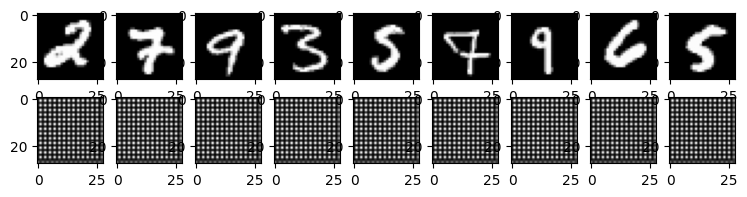

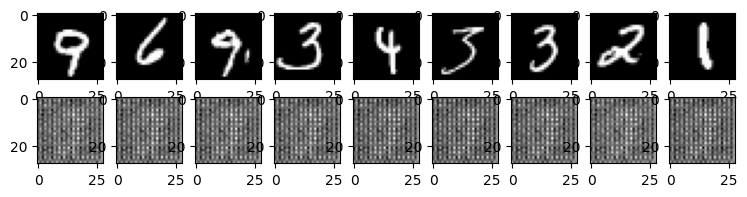

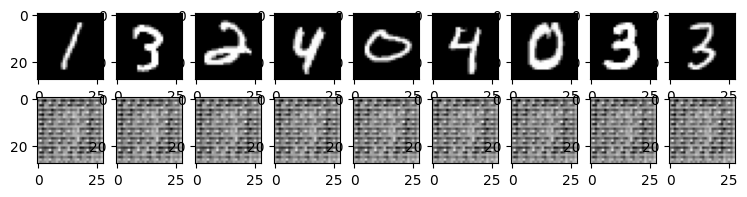

In [ ]:
#plot image
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        #item: 1, 28, 28 
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        #item: 1, 28, 28 
        plt.imshow(item[0])

# output compressed due to github saving space by lowering resolution